<a href="https://colab.research.google.com/github/KoreTane/Preparing-ML/blob/main/CBS_Dance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install xlsxwriter
!pip install fuzzywuzzy
!pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 33.8 MB/s eta 0:00:00


In [4]:
import pandas as pd  # Manipulação de dados em formato de tabela
import numpy as np  # Para operações numéricas
from scipy import stats  # Para estatística e análise de dados
import xlsxwriter  # Criar e manipular arquivos Excel
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import seaborn as sns  # Biblioteca para visualização de dados
from scipy.stats import chi2_contingency  # Função para calcular a estatística de qui-quadrado
import math  # Operações matemáticas
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import tabula

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [6]:
dfc = pd.read_excel('CrmAgendaClientes.xlsx')

In [7]:
# Definir tema global para os gráficos
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [8]:
# Listar os atributos e funções de um objeto, excluindo os que começam com _
def list_attributes(obj):
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

<h1><font size="5" color="#FF69B4">Exploração e tratamento de dados</font></h1>

<p><font size="4">Nesta seção, vamos explorar e tratar os dados para prepará-los para a análise. Isso inclui:

* Visualização dos dados para entender a distribuição e a estrutura
* Tratamento de valores ausentes e outliers
* Transformação de variáveis para melhorar a análise.</font></p>

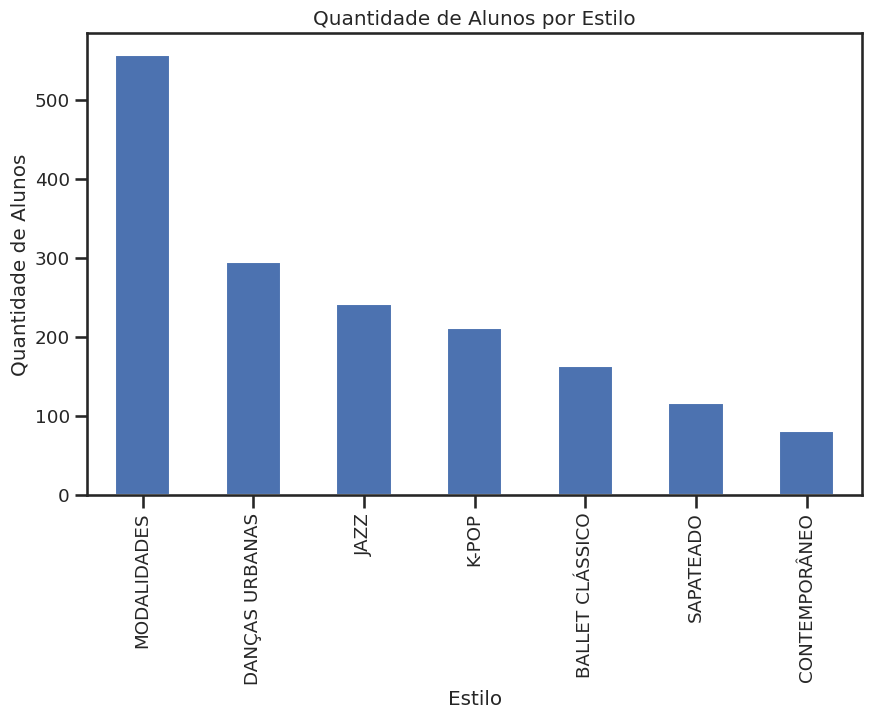

In [9]:
style_counts = df['ESTILOS'].value_counts()

# Plotar o gráfico de barras qtd. alundos x estilos
plt.figure(figsize=(10, 6))
style_counts.plot(kind='bar')
plt.title('Quantidade de Alunos por Estilo')
plt.xlabel('Estilo')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [11]:
# Criar uma tabela de contingência entre as variáveis
contingency_table = pd.crosstab(df['FAIXA ETARIA'], df['ESTILOS'])

In [12]:
# Calcular o valor de Cramer's V (Medida de correlação entre FAIXA ETARIA e ESTILOS, onde 0 é nenhuma correlação e 1 é correlação perfeita)
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramer_v = math.sqrt(chi2 / (df.shape[0] * df.shape[1] * (dof - 1)))

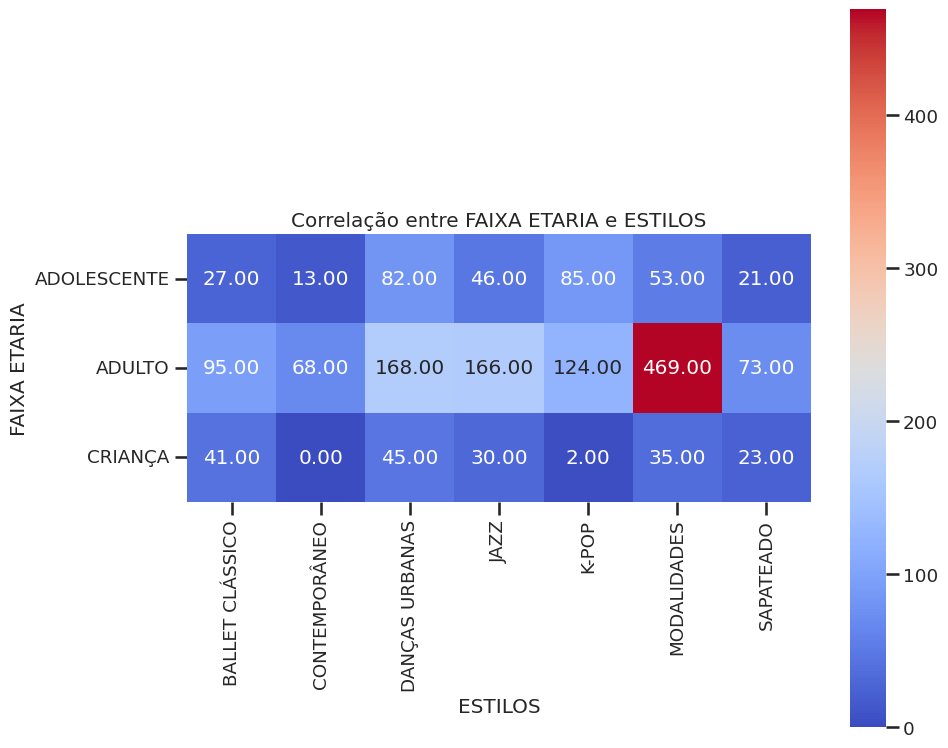

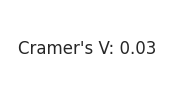

In [13]:
# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre FAIXA ETARIA e ESTILOS')
plt.tight_layout()
plt.show()

plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_v:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é 0.3, isso significa que há uma relação moderada entre a faixa etaria dos alunos e estilos de danças

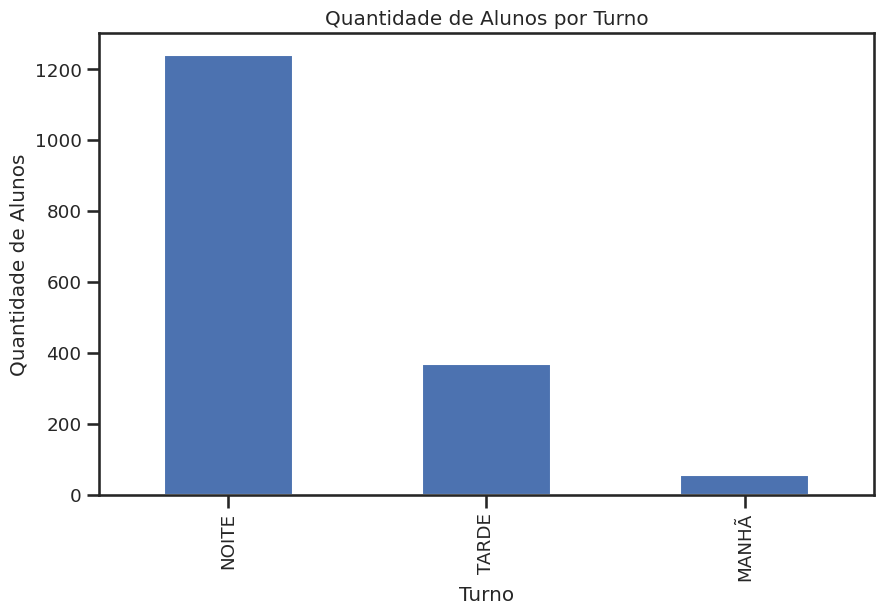

In [14]:
style_countsT = df['TURNO'].value_counts()

plt.figure(figsize=(10, 6))
style_countsT.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [ ]:
contingency_tableT = pd.crosstab(df['TURNO'], df['ESTILOS'])

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_tableT)
cramer_vT = math.sqrt(chi2 / (df.shape[0] * df.shape[1] * (dof - 1)))

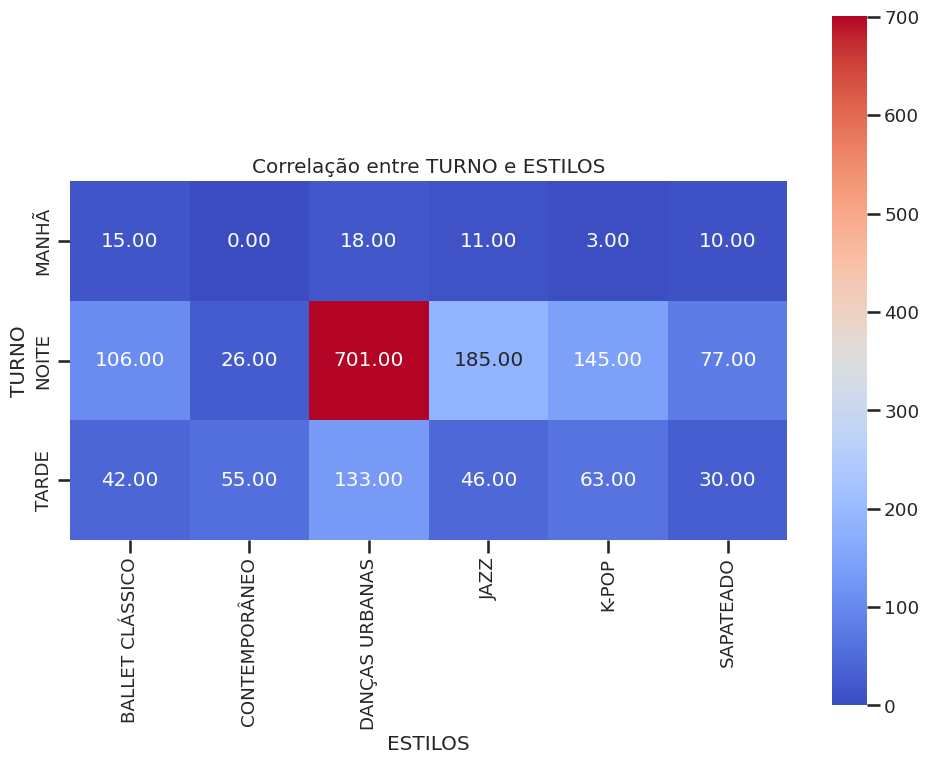

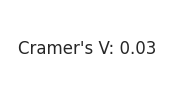

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_tableT, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre TURNO e ESTILOS')
plt.tight_layout()
plt.show()

plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_vT:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é: 0.02 associação fraca entre as variáveis turno e estilos

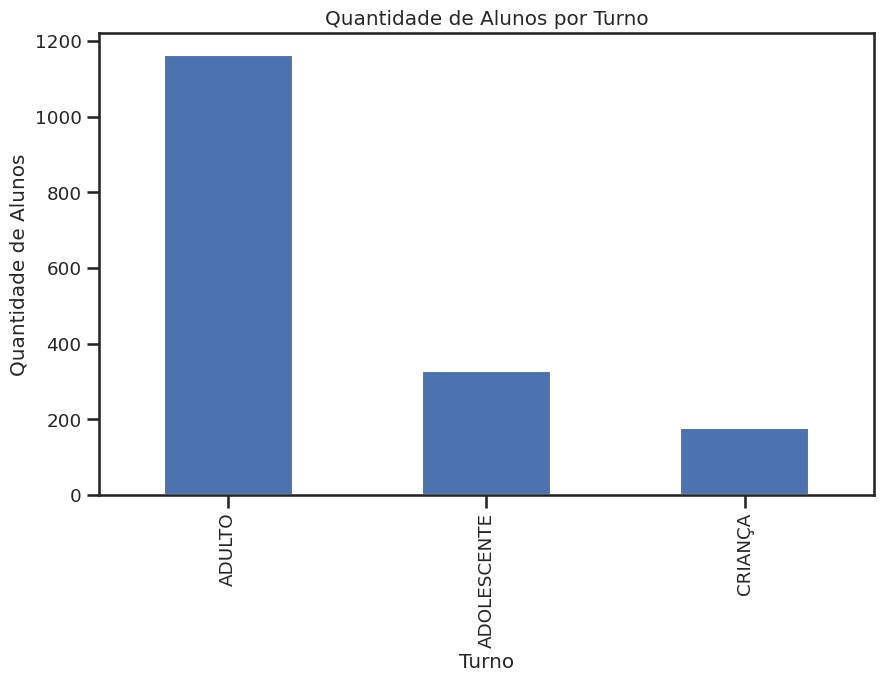

In [ ]:
style_countsT = df['FAIXA ETARIA'].value_counts()

plt.figure(figsize=(10, 6))
style_countsT.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [ ]:
df.head(5)

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,REAGENDAMENTO,SITUAÇÃO,OBSERVAÇÕES,SITUAÇÃO_FINAL
0,2022-01-07,1,GRAZIELE,22,ADULTO,0000-0000,EXPERIMENTAL,WHATSAPP,DANÇAS URBANAS,NaT,NOITE,ALISSON,SIM,NÃO,MATRICULADO,Sem observações,CONTRATADO
1,2022-01-07,1,CAMILA,19,ADULTO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,NaT,NOITE,LIA,NÃO,NÃO,SEMANA SOLIDÁRIA,Sem observações,DESISTIU
2,2021-01-05,1,MAIARA GOUVEA,16,ADULTO,0000-0000,EXPERIMENTAL,WHATS,K-POP,NaT,NOITE,ALISSON,NÃO,NÃO,NÃO RESPONDE,Sem observações,DESISTIU
3,2021-01-05,1,ENIALE RAMOS QUINTINO MÃE ELAINE,11,ADOLESCENTE,0000-0000,EXPERIMENTAL,WHATS,JAZZ,NaT,TARDE,LIA,SIM,NÃO,MATRICULADO,Sem observações,CONTRATADO
4,2022-01-07,1,BIA,19,ADULTO,0000-0000,CAPTAÇÃO,WHATSAPP,DANÇAS URBANAS,NaT,NOITE,NÃO INFORMADO,NÃO,NÃO,SEMANA SOLIDÁRIA,Sem observações,DESISTIU


In [ ]:
df['STATUS'].unique()

array(['EXPERIMENTAL', 'CAPTAÇÃO'], dtype=object)

In [ ]:
# Convertendo categorias para category
categorias = ['STATUS', 'VIA', 'ESTILOS', 'PROFESSOR', 'COMPARECEU', 'REAGENDAMENTO', 'SITUAÇÃO', 'FAIXA ETARIA', 'TURNO']
for col in categorias:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1673
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA 1º CONTATO   1666 non-null   datetime64[ns]
 1   TRIMESTRE         1666 non-null   int64         
 2   NOME COMPLETO     1666 non-null   object        
 3   IDADE             1666 non-null   int64         
 4   FAIXA ETARIA      1666 non-null   category      
 5   TELEFONE          1666 non-null   object        
 6   STATUS            1666 non-null   category      
 7   VIA               1666 non-null   category      
 8   ESTILOS           1666 non-null   category      
 9   DATA AGENDAMENTO  1666 non-null   object        
 10  TURNO             1666 non-null   category      
 11  PROFESSOR         1666 non-null   category      
 12  COMPARECEU        1666 non-null   category      
 13  REAGENDAMENTO     1666 non-null   category      
 14  SITUAÇÃO          1637 n

<h1><font size="5" color="#FF69B4">Exportação arquivo</font></h1>

<p><font size="4">Exportar o arquivo com as formatações e filtros.</font></p>

In [ ]:
# Exportar um arquivo xlsx com as formatações/filtros
# Configurações de formatação
header_format = {
    'bold': True,
    'font_size': 12,
    'align': 'center',
    'valign': 'vcenter',
    'fg_color': '#D3D3D3',
    'border': 1
}

cell_format = {
    'font_size': 11,
    'align': 'center',
    'valign': 'vcenter',
    'border': 1
}

# Crie o objeto ExcelWriter
with pd.ExcelWriter('CRM.xlsx', engine='xlsxwriter') as writer:
    # Exporte o DataFrame para o arquivo xlsx
    df.to_excel(writer, sheet_name='CRM', index=False)

    # Formate a planilha
    workbook = writer.book
    worksheet = writer.sheets['CRM']

    # Adicione o filtro ao cabeçalho
    worksheet.autofilter(0, 0, 0, len(df.columns) - 1)

    # Formatação do cabeçalho
    header_format_obj = workbook.add_format(header_format)
    for col_num, value in enumerate(df.columns.values):
        worksheet.write(0, col_num, value, header_format_obj)

    # Formatação das células
    cell_format_obj = workbook.add_format(cell_format)
    date_format_obj = workbook.add_format({'num_format': 'yyyy-mm-dd', 'border': 1})

    for row_num, row_data in enumerate(df.values):
        for col_num, value in enumerate(row_data):
            if pd.isnull(value):
                worksheet.write(row_num + 1, col_num, '', cell_format_obj)
            elif col_num == 0:
                worksheet.write(row_num + 1, col_num, value, date_format_obj)
            else:
                worksheet.write(row_num + 1, col_num, value, cell_format_obj)

    # Ajuste a largura das colunas
    for col_num, col_width in enumerate([20, 20, 20]):
        worksheet.set_column(col_num, col_num, col_width)

    # Descomente a linha abaixo se você tiver outro DataFrame para exportar
    # df_pc.to_excel(writer, sheet_name='Plano de contas', index=False)

In [ ]:
dfC =pd.read_excel('MatriculaCEP.xlsx')

In [ ]:
dfC

,Matrícula,Nome,CEP
0,23001,Clara Yumi Shiraishi,12242-431
1,23002,Luisa Mendes Hypolito Neves Pires,12243-710
2,23003,Sofia Mendes Hypolito Neves Pires,12243-710
3,23008,Maria Eduarda Guedes Santos,12231-070
4,23009,Maria Clara Coelho,12242-410
...,...,...,...
86,24030,Henrique Fernandes Veloso,12243-630
87,24031,Priscilla Pereira Figueiredo,12233-002
88,24032,Rafaela Luchi Marques Penteado,12237-410
89,24033,Leticia Akemi Kague,12246-021


In [ ]:
# Deixe a coluna "Nome" em caixa alta
dfC['Nome'] = dfC['Nome'].str.upper()

In [ ]:
nomes_comuns = dfC['Nome'][dfC['Nome'].isin(df['NOME COMPLETO'])]
nomes_comuns

31         GIOVANNA PEREIRA FLORES
40         MEIRE NAKAMURA YAMAMOTO
45      MARIA RITA BARROS MEDEIROS
53      BENJAMIN PONTE DE OLIVEIRA
55                JOYCE CRUZ PONTE
57        CLARA KRUSCHEWSKY FRANCO
58     MYLENA RODRIGUES GOMES ARÃO
59    ISABELLY CRISTINA REIS SILVA
63             CLARA ARRUDA COELHO
72     ISABELLA IRIE TEIXEIRA REIS
80          ANA CLARA MELO JARONES
Name: Nome, dtype: object

In [ ]:
# Encontre os nomes parecidos em ambas as colunas
nomes_parecidos = []
for nome in dfC['Nome']:
    for outro_nome in df['NOME COMPLETO']:
        if fuzz.ratio(nome, outro_nome) > 80:  # ajuste o valor de threshold aqui
            nomes_parecidos.append((nome, outro_nome))
nomes_parecidos

[('SOFIA MENDES HYPOLITO NEVES PIRES',
  'SOFIA MENDES HYPOLITO NEVES PIRES JÁ É ALUNA'),
 ('FERNANDA SAYURI YKEDA', 'FERNANDA SAYURI'),
 ('BEATRIZ SCHIMIDT BARONI', 'BEATRIZ SCHIMIDT BARONI JÁ É ALUNA'),
 ('ANA CLARA RAMOS CASIMIRO', 'ANA CLARA RAMOS CASEMIRO'),
 ('GIOVANNA PEREIRA FLORES', 'GIOVANNA PEREIRA FLORES'),
 ('VANESSA DE ALMEIDA VITÓRIA', 'VANESSA DE ALMEIDA VITORIA'),
 ('THALITA DIAS FERREIRA', 'TALITHA MORAES FERREIRA'),
 ('MEIRE NAKAMURA YAMAMOTO', 'MEIRE NAKAMURA YAMAMOTO'),
 ('MARIA RITA BARROS MEDEIROS', 'MARIA RITA BARROS MEDEIROS'),
 ('MARIA RITA BARROS MEDEIROS', 'MARIA RITA BARROS MEDEIROS'),
 ('MARIA RITA BARROS MEDEIROS', 'MARIA RITA BARROS MEDEIROS'),
 ('MANUELA NASCIMENTO DE ARAÚJO', 'MANUELA NASCIMENTO MÃE RENATA'),
 ('ELIS HELENA CRUZ PUNTO DE OLIVEIRA', 'ELIS HELENA CRUZ PONTE DE OLIVEIRA'),
 ('BENJAMIN PONTE DE OLIVEIRA', 'BENJAMIN PONTE DE OLIVEIRA'),
 ('JOYCE CRUZ PONTE', 'JOYCE CRUZ PONTE'),
 ('CLARA KRUSCHEWSKY FRANCO', 'CLARA KRUSCHEWSKY FRANCO'),
 ('

In [ ]:
nomes_parecidos = pd.Series(nomes_parecidos)
nomes_parecidos.value_counts()

(ALINE DE FÁTIMA DE CARVALHO VIEIRA, ALINE DE FATIMA DE CARVALHO VIEIRA)             4
(ISABELLA IRIE TEIXEIRA REIS, ISABELLA IRIE TEIXEIRA REIS)                           3
(MARIA RITA BARROS MEDEIROS, MARIA RITA BARROS MEDEIROS)                             3
(CLARA ARRUDA COELHO, CLARA ARRUDA COELHO)                                           2
(AMANDA VENEGAS DOS ANJOS, AMANDA VENEGAS DOS ANJOS CASSIANA)                        2
(SOFIA MENDES HYPOLITO NEVES PIRES, SOFIA MENDES HYPOLITO NEVES PIRES JÁ É ALUNA)    1
(JOYCE CRUZ PONTE, JOYCE CRUZ PONTE)                                                 1
(YASMIN CHU ALVES DA SILVA, YASMIN CHU ALVES DA SILVA MÃE CHU)                       1
(MARIA EDUARDA DA ROSA VIEIRA, MARIA EDUARDA DA ROSA)                                1
(ISABELLY CRISTINA REIS SILVA, ISABELLY CRISTINA REIS SILVA)                         1
(MYLENA RODRIGUES GOMES ARÃO, MYLENA RODRIGUES GOMES ARÃO)                           1
(CLARA KRUSCHEWSKY FRANCO, CLARA KRUSCHEWSK

In [ ]:
# Ler o arquivo PDF com configurações de leitura ajustadas
ReceitaSet23 = tabula.read_pdf('Relatório de receitas - Set 23.pdf', pages='all',
                              guess=False,
                              lattice=True,
                              stream=True,
                              multiple_tables=True,
                              pandas_options={'header': None,
                                              'parse_dates': False})

# Substitua os valores vazios por NaN
ReceitaSet23 = ReceitaSet23.replace('', pd.NA)

FileNotFoundError: [Errno 2] No such file or directory: 'Relatório de receitas - Set 23.pdf'